<a href="https://colab.research.google.com/github/Demonking09/House_Prediction_Model/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 55196041216.0000 - val_loss: 22563223552.0000
Epoch 2/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15429608448.0000 - val_loss: 9495651328.0000
Epoch 3/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8968525824.0000 - val_loss: 7244764160.0000
Epoch 4/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7055077888.0000 - val_loss: 6064737792.0000
Epoch 5/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6088253952.0000 - val_loss: 5284710912.0000
Epoch 6/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5374958080.0000 - val_loss: 4864573952.0000
Epoch 7/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4796849152.0000 - val_loss: 4636499968.0000
Epoch 8/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4750330368.0000 - val_loss: 4455571968.0000
Epoch 9/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4621870592.0000 - val_loss: 4381878272.0000
Epoch 10/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 46

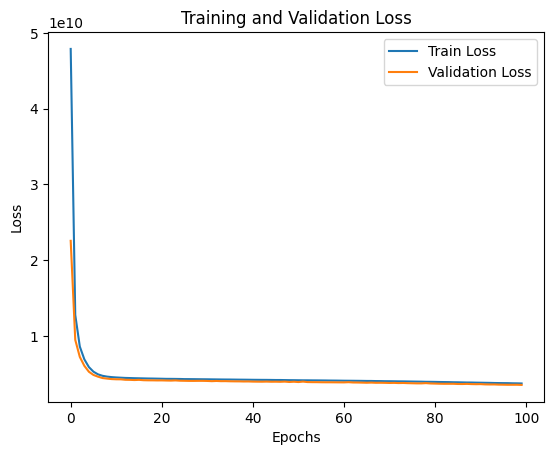

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step


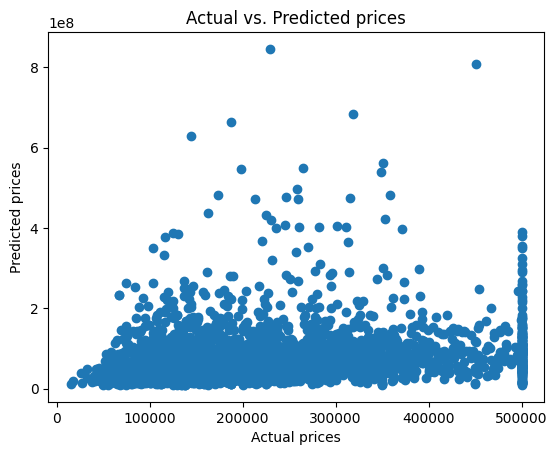

'\nimport numpy as np\nimport pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import StandardScaler\nimport tensorflow as tf\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense\nfrom tensorflow.keras.optimizers import Adam\n\n# Step 1: Load the California Housing dataset from CSV\ndata = pd.read_csv(\'/content/sample_data/california_housing_train.csv\')\n\n# Preview the data\nprint(data.head())\n\n# Step 2: Split features and target\n# Assume the target column is \'median_house_value\' and features are the remaining columns\nX = data.drop(columns=[\'median_house_value\'])  # Features\ny = data[\'median_house_value\']  # Target variable\n\n# Step 3: Handle missing values (if any)\nX = X.fillna(X.mean())  # Fill missing values with the mean of each column\n\n# Step 4: Scale the features\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)\n\n# Step 5: Split the data into training and testing s

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
train_data = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Data Preprocessing

# Handle missing values

#train_data.fillna(train_data.mean(), inplace=True)  # Impute missing numerical values with column mean

# Convert categorical variables into dummy variables (One-Hot Encoding)
train_data = pd.get_dummies(train_data)

# Separate features (X) and target variable (y)
X = train_data.drop(columns=['median_house_value'])
y = train_data['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (scale the data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Deep Feed Forward Neural Network (DFNN) Model
model = Sequential()

# Input layer and hidden layers
model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))  # First hidden layer
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dense(32, activation='relu'))  # Third hidden layer

# Output layer (single output for regression)
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.4f}")

# Optionally, plot the training loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs. Predicted prices")
plt.show()
